In [89]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
land_instance = pd.read_csv("C:/Users/jerry/Desktop/國十案例merge.csv",encoding='utf-8')
land_instance

,採用,鄉鎮市區,鄉鎮市區編號,交易標的,土地位置,移轉情形,面積_平方公尺,分區,分區編號,用地類型,用地編號,案例類型,案例類型_編碼,交易年月日,年度,總價_元,單價
0,Y,里港鄉,1,土地,中和段21地號,全筆移轉,1367.11,鄉村區,7,乙種建築用地,1,住,1,1071126,107,9500000,6949
1,Y,里港鄉,1,土地,三張廍段488地號,全筆移轉,10727.00,一般農業區,1,農牧用地,9,農,3,1070725,107,31170000,2906
2,Y,里港鄉,1,土地,瀰力肚段25-9地號,全筆移轉,6172.00,一般農業區,1,農牧用地,9,農,3,1080107,108,6789200,1100
3,Y,里港鄉,1,土地,土庫段225-6地號,全筆移轉,3495.00,一般農業區,1,農牧用地,9,農,3,1071211,107,4500000,1288
4,Y,里港鄉,1,土地,新土庫段32-1地號,全筆移轉,43.79,鄉村區,7,乙種建築用地,1,住,1,1071119,107,166155,3794
5,Y,里港鄉,1,土地,大港洋段1641地號,全筆移轉,2487.00,特定農業區,5,農牧用地,9,農,3,1080128,108,7600000,3056
6,Y,里港鄉,1,土地,載興段1763地號,全筆移轉,1700.44,一般農業區,1,農牧用地,9,農,3,1080212,108,3700000,2176
7,Y,里港鄉,1,土地,磚仔地段43地號,全筆移轉,85.13,鄉村區,7,乙種建築用地,1,住,1,1080124,108,800000,9397
8,Y,里港鄉,1,土地,定國段384地號,全筆移轉,8140.17,一般農業區,1,農牧用地,9,農,3,1080201,108,18040000,2216
9,Y,里港鄉,1,土地,土庫段1266地號,全筆移轉,18239.00,一般農業區,1,農牧用地,9,農,3,1080329,108,30000000,1645


In [80]:
land_instance.columns[[2,6,8,10,12,14,16]]
land_instance = land_instance[['鄉鎮市區編號', '面積_平方公尺', '分區編號', '用地編號', '案例類型_編碼', '年度', '單價']]
land_instance

,鄉鎮市區編號,面積_平方公尺,分區編號,用地編號,案例類型_編碼,年度,單價
0,1,1367.11,7,1,1,107,6949
1,1,10727.00,1,9,3,107,2906
2,1,6172.00,1,9,3,108,1100
3,1,3495.00,1,9,3,107,1288
4,1,43.79,7,1,1,107,3794
5,1,2487.00,5,9,3,108,3056
6,1,1700.44,1,9,3,108,2176
7,1,85.13,7,1,1,108,9397
8,1,8140.17,1,9,3,108,2216
9,1,18239.00,1,9,3,108,1645


In [88]:
scaler = StandardScaler()
Z_sk = scaler.fit_transform(land_instance)
Z = (land_instance - land_instance.mean(axis=0)) / land_instance.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)
land_instance.iloc[:, 1:] = Z
display(land_instance.head(5).style\
        .format("{:.2f}", subset=land_instance.columns[1:]))

C:\Users\jerry\anaconda3\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,鄉鎮市區編號,面積_平方公尺,分區編號,用地編號,案例類型_編碼,年度,單價
0,1,-1.15,-1.15,-0.45,1.61,-3.00,-2.80
1,1,-1.15,-1.15,3.61,-1.22,0.37,0.36
2,1,-1.15,-1.15,1.63,-1.22,0.37,0.36
3,1,-1.15,-1.15,0.47,-1.22,0.37,0.36
4,1,-1.15,-1.15,-1.02,1.61,-3.00,-2.80


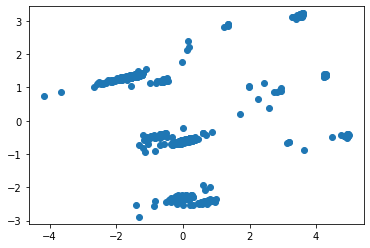

In [90]:
n_components = 2
random_state = 9527
pca = PCA(n_components=n_components, 
          random_state=random_state)
L = pca.fit_transform(Z)
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal');

In [93]:
pcs = np.array(pca.components_)
df_pc = pd.DataFrame(pcs, columns=land_instance.columns[:])
df_pc.index = [f"第{c}主成分" for c in['一', '二']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")

,鄉鎮市區編號,面積_平方公尺,分區編號,用地編號,案例類型_編碼,年度,單價
第一主成分,0.24,0.24,-0.31,0.47,-0.53,-0.53,0.0066
第二主成分,-0.64,-0.64,-0.065,-0.069,-0.3,-0.3,0.033


In [97]:
pca_10d = PCA(7, random_state=random_state)
pca_10d.fit(Z)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.35, 0.29, 0.14, 0.12, 0.08, 0.01, 0.  ])